[-0.44417355  6.32762496]


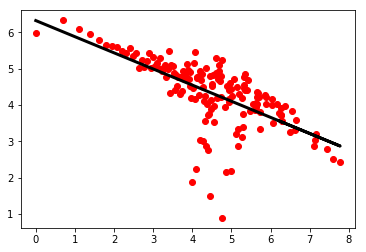

[nan nan]


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:436: RuntimeWarning: Number of calls to function has reached maxfev = 600.
  warnings.warn(errors[info][0], RuntimeWarning)


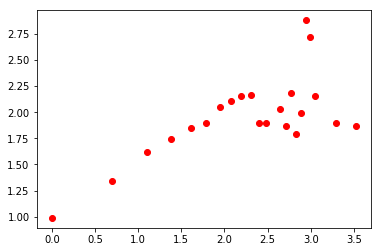

In [6]:
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import random as rm
from scipy import optimize


def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

science = nx.read_gml("netscience.gml")
july = nx.read_gml("as-22july06.gml")

#--------------------------------------------------------------------------------------------------------------------------------
def ej_4(grafo):
    #ARMO UNA LISTA DE LOS NODOS.
    grafo_nodos = grafo.nodes()
    grafo_nodos_lista = list(grafo_nodos) #ESTO TRANSFORMA A LISTA CUALQUIER VARIABLE. ACA TENGO LOS NODOS.

#VEO LAS UNIONES DE ESOS NODOS.
    uniones = []
    for i in range (len(grafo_nodos_lista)):
        union = []
        for nodo in grafo.neighbors(grafo_nodos_lista[i]):
            union.append(nodo)
        uniones.append(union)
#VEO EL GRADO DE CADA NODO.
    grados_por_nodo = []
    for l in range (len(grafo_nodos_lista)):
        grado_nodo_l = grafo.degree(grafo_nodos_lista[l])
        grados_por_nodo.append(grado_nodo_l)

#VEO EL GRADO DE MIS VECINOS.
    grados_vecino_por_nodo = []
    for l in range (len(uniones)):
        grados_nodos_vecinos = []
        for m in range (len(uniones[l])):
            grado_nodo_m = grafo.degree(uniones[l][m])
            grados_nodos_vecinos.append(grado_nodo_m)
        grados_vecino_por_nodo.append(grados_nodos_vecinos)

#CALCULO VALOR MEDIO DE LOS VECINOS DE NODOS DE GRADO K.
    promedio_vecinos = []
    for i in grados_vecino_por_nodo:
        val_medio_por_vecinos = np.mean (i)
        promedio_vecinos.append (val_medio_por_vecinos)

    nombre_gnodo_gvecinos = []
    for n,g,v in zip(grafo_nodos_lista,grados_por_nodo,promedio_vecinos):
        nombre_gnodo_gvecinos.append([n,g,v])

    gnodo_vmedio_vecinos = []
    grados = list(set(grados_por_nodo))
    for grado in grados:
        m = []
        for i in nombre_gnodo_gvecinos:
            if i[1] == grado:
                 m.append(i[2])
        m_valmedio = np.mean (m)
        gnodo_vmedio_vecinos.append([grado,m_valmedio])

    x = np.zeros (len(gnodo_vmedio_vecinos))
    y = np.zeros (len(gnodo_vmedio_vecinos))
    for i in range (len(gnodo_vmedio_vecinos)):
        x[i] = gnodo_vmedio_vecinos[i][0]
        y[i] = gnodo_vmedio_vecinos[i][1]

    x_log = np.log (x)
    y_log = np.log (y)

    #CON ESTO ARMO LA FUNCION QUE FITEA LOS DATOS LOGARITMICOS.
    fitfunc = lambda p, x_log: p[0]*x_log+p[1]
    p0 = [1, 1]

    errfunc = lambda p, x_log, y_log: fitfunc(p, x_log) - y_log
    p1, suc = optimize.leastsq(errfunc, p0[:], args=(x_log, y_log)) #EL P1 TIENE LOS ELEMENTOS DE MI FITEO. los parametros de mi lineal.
    plt.plot(x_log, y_log, "ro", x_log, fitfunc(p1, x_log), "k-", linewidth=3)
    print (p1)

    #plt.plot (np.log(x),np.log(y),"r.")

    plt.show ()
#--------------------------------------------------------------------------------------------------------------------------------

ej_4(july)

ej_4(science)


[-0.44417355  6.32762496]


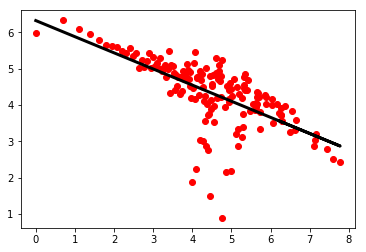

[[1,
  2016,
  423,
  523,
  204,
  303,
  529,
  146,
  424,
  288,
  284,
  697,
  142,
  116,
  212,
  590,
  229,
  169,
  206,
  90,
  52,
  532,
  286,
  755,
  276,
  1243,
  209,
  178,
  362,
  48,
  77,
  57,
  62,
  10,
  658,
  28,
  132,
  125,
  34,
  268,
  43,
  49,
  26,
  65,
  68,
  36,
  2,
  90,
  11,
  105,
  207,
  110,
  425,
  104,
  27,
  29,
  107,
  36,
  10,
  25,
  6,
  2,
  2,
  30,
  24,
  30,
  278,
  20,
  20,
  240,
  52,
  32,
  93,
  150,
  25,
  77,
  65,
  62,
  29,
  24,
  58,
  15,
  70,
  24,
  37,
  75,
  18,
  37,
  18,
  24,
  11,
  42,
  36,
  57,
  96,
  18,
  86,
  23,
  55,
  48,
  16,
  24,
  11,
  72,
  89,
  80,
  22,
  19,
  6,
  14,
  28,
  12,
  65,
  45,
  11,
  24,
  18,
  19,
  22,
  12,
  20,
  26,
  17,
  141,
  50,
  14,
  26,
  2,
  3,
  17,
  7,
  13,
  7,
  12,
  4,
  1,
  20,
  2,
  5,
  9,
  21,
  3,
  17,
  22,
  13,
  2,
  27,
  2,
  2,
  16,
  38,
  25,
  18,
  13,
  2,
  18,
  11,
  9,
  7,
  7,
  8,
  10,
  6,
  2,


In [11]:
#4.IV
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import random as rm
from scipy import optimize


july = nx.read_gml("as-22july06.gml")

def ej_4(grafo):
    #ARMO UNA LISTA DE LOS NODOS.
    grafo_nodos = grafo.nodes()
    grafo_nodos_lista = list(grafo_nodos) #ESTO TRANSFORMA A LISTA CUALQUIER VARIABLE. ACA TENGO LOS NODOS.

#VEO LAS UNIONES DE ESOS NODOS.
    uniones = []
    for i in range (len(grafo_nodos_lista)):
        union = []
        for nodo in grafo.neighbors(grafo_nodos_lista[i]):
            union.append(nodo)
        uniones.append(union)
#VEO EL GRADO DE CADA NODO.
    grados_por_nodo = []
    for l in range (len(grafo_nodos_lista)):
        grado_nodo_l = grafo.degree(grafo_nodos_lista[l])
        grados_por_nodo.append(grado_nodo_l)

#VEO EL GRADO DE MIS VECINOS.
    grados_vecino_por_nodo = []
    for l in range (len(uniones)):
        grados_nodos_vecinos = []
        for m in range (len(uniones[l])):
            grado_nodo_m = grafo.degree(uniones[l][m])
            grados_nodos_vecinos.append(grado_nodo_m)
        grados_vecino_por_nodo.append(grados_nodos_vecinos)

#CALCULO VALOR MEDIO DE LOS VECINOS DE NODOS DE GRADO K.
    promedio_vecinos = []
    for i in grados_vecino_por_nodo:
        val_medio_por_vecinos = np.mean (i)
        promedio_vecinos.append (val_medio_por_vecinos)

    nombre_gnodo_gvecinos = []
    
    for n,g,v in zip(grafo_nodos_lista,grados_por_nodo,promedio_vecinos):
        nombre_gnodo_gvecinos.append([n,g,v])

    gnodo_vmedio_vecinos = []
    grados = list(set(grados_por_nodo))
    for grado in grados:
        m = []
        for i in nombre_gnodo_gvecinos:
            if i[1] == grado:
                 m.append(i[2])
        m_valmedio = np.mean (m)
        gnodo_vmedio_vecinos.append([grado,m_valmedio])

    x = np.zeros (len(gnodo_vmedio_vecinos))
    y = np.zeros (len(gnodo_vmedio_vecinos))
    for i in range (len(gnodo_vmedio_vecinos)):
        x[i] = gnodo_vmedio_vecinos[i][0]
        y[i] = gnodo_vmedio_vecinos[i][1]

    x_log = np.log (x)
    y_log = np.log (y)

    #CON ESTO ARMO LA FUNCION QUE FITEA LOS DATOS LOGARITMICOS.
    fitfunc = lambda p, x_log: p[0]*x_log+p[1]
    p0 = [1, 1]

    errfunc = lambda p, x_log, y_log: fitfunc(p, x_log) - y_log
    p1, suc = optimize.leastsq(errfunc, p0[:], args=(x_log, y_log)) #EL P1 TIENE LOS ELEMENTOS DE MI FITEO. los parametros de mi lineal.
    plt.plot(x_log, y_log, "ro", x_log, fitfunc(p1, x_log), "k-", linewidth=3)
    print (p1)

    #plt.plot (np.log(x),np.log(y),"r.")

    plt.show ()



In [10]:
lista=[1,2,3,2]

y=0
for i in lista:
    y=y+i**2

y

    
    S1=sum(grado_por_nodo)
    S2=0
    for grado in grado_por_nodo:
        S2 = S2 + grado**2
    Se = 0
    for i,j in zip(nombre_gnodo_gvecinos,uniones)
        ki = i[1]
        for h in range(len(j))
            kj=j


18